# Example Template for HW3

This notebook contains the same template code as "logisticClassify2.py", but reorganized to make it simpler to edit and solve in iPython.  Feel free to use this for your homework, or do it another way, as you prefer.



In [1]:
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt   # use matplotlib for plotting with inline plots
%matplotlib inline
plt.set_cmap('jet');
import warnings

warnings.filterwarnings('ignore') # for deprecated matplotlib functions

SyntaxError: invalid syntax (logisticClassify2.py, line 88)

## Problem 1

In [2]:
iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1]   # get first two features & target
X,Y  = ml.shuffleData(X,Y)       # reorder randomly rather than by class label
X,_  = ml.transforms.rescale(X)  # rescale to improve numerical stability, speed convergence

XA, YA = X[Y<2,:], Y[Y<2]        # Dataset A: class 0 vs class 1
XB, YB = X[Y>0,:], Y[Y>0]        # Dataset B: class 1 vs class 2

### P1.1

Dataset XA: 


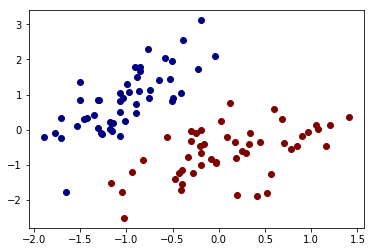

Dataset XB: 


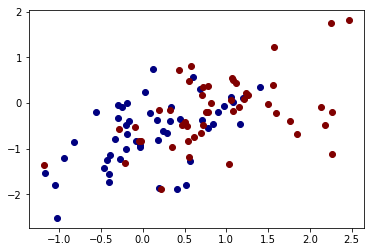

In [3]:
print("Dataset XA: ")
ml.plotClassify2D(None, XA, YA)
plt.show()
print("Dataset XB: ")
ml.plotClassify2D(None, XB, YB)
plt.show()

Clearly, dataset XA is linearly separable while XB is not.

### P1.2

In [4]:
def myPlotBoundary(self, X,Y):
    """ Plot the (linear) decision boundary of the classifier, along with data """
    if len(self.theta) != 3: raise ValueError('Data & model must be 2D');
    ax = X.min(0),X.max(0); ax = (ax[0][0],ax[1][0],ax[0][1],ax[1][1]);
    ## TODO: find points on decision boundary defined by theta0 + theta1 X1 + theta2 X2 == 0
    x1b = np.array([ax[0],ax[1]]);  # at X1 = points in x1b
    x2b =  (-self.theta[0]-self.theta[1]*x1b)/self.theta[2];      # TODO find x2 values as a function of x1's values
    ## Now plot the data and the resulting boundary:
    A = Y==self.classes[0]; # and plot it:
    plt.plot(X[A,0],X[A,1],'b.',X[-A,0],X[-A,1],'r.',x1b,x2b,'k-'); plt.axis(ax); plt.draw();
    

### P1.3

In [7]:
# Should go in your logistic2 class:
#I put this code in the logisticClassify2 file predict function.
def MyPredict(self,X):
    """ Return the predictied class of each data point in X"""
    ## TODO: compute linear response r[i] = theta0 + theta1 X[i,1] + theta2 X[i,2]  for each i
    ## TODO: if z[i] > 0, predict class 1:  Yhat[i] = self.classes[1]
    ##       else predict class 0:  Yhat[i] = self.classes[0]
    
    Yhat = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        value = self.theta[0] + self.theta[1]*X[i,0] + self.theta[2]*X[i,1]
        if value > 0:
            Yhat[i] = self.classes[1];
        else:
            Yhat[i] = self.classes[0];
            
    return Yhat

In [17]:
#Error Rates for XA and XB

from logisticClassify2 import *

learnerA = logisticClassify2();
learnerA.classes = np.unique(YA)
wts = np.array([0.5,1,-0.25]);
learnerA.theta = wts
ErrorA = learnerA.err(XA, YA);
print("Error for Dataset XA: ", ErrorA);
learnerB = logisticClassify2();
learnerB.classes = np.unique(YB)
wts = np.array([0.5,1,-0.25]);
learnerB.theta = wts
ErrorB = learnerB.err(XB, YB);
print("Error for Dataset XB: ", ErrorB);

Error for Dataset XA:  0.0505050505051
Error for Dataset XB:  0.464646464646


If predict is implemented, then the inherited 2D visualization function should work; you can verify your decision boundary from P1.2:

### P1.4

Prediction on dataset XA: 


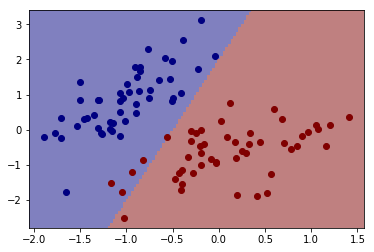

Prediction on Data set XB: 


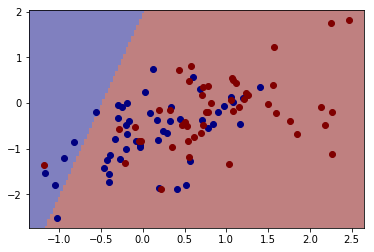

In [18]:
print("Prediction on dataset XA: ")
ml.plotClassify2D(learnerA, XA, YA);
plt.show();
print("Prediction on Data set XB: ")
ml.plotClassify2D(learnerB, XB, YB);
plt.show();

## ...


Here is an example of latex equations that may be useful for expressing the gradient:

### 1.5 Gradient of NLL

Our negative log-likelihood loss is:
$$J_j(\theta) = - \begin{cases} \log( \sigma(x^{(i)} \cdot \theta)) & \mbox{if}\  y^{(i)}=1 \\ \log(1-\sigma(x^{(i)} \cdot \theta)) & \mbox{if}\  y^{(i)}=0 \end{cases}$$

Thus, its gradient is:
$$\nabla J_j(\theta) = (something)$$

## 1.6

Now define the train function and complete its missing code.

In [ ]:
def myTrain(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None):
    """ Train the logistic regression using stochastic gradient descent """
    M,N = X.shape;                     # initialize the model if necessary:
    self.classes = np.unique(Y);       # Y may have two classes, any values
    XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
    YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
    if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
    # init loop variables:
    epoch=0; done=False; Jnll=[]; J01=[];
    while not done:
        stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
        # Do an SGD pass through the entire data set:
        for i in np.random.permutation(M):
            ri    = NotImplementedError;     # TODO: compute linear response r(x)
            gradi = NotImplementedError;     # TODO: compute gradient of NLL loss
            self.theta -= stepsize * gradi;  # take a gradient step

        J01.append( self.err(X,Y) )  # evaluate the current error rate

        ## TODO: compute surrogate loss (logistic negative log-likelihood)
        ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
        Jnll.append( NotImplementedError ) # TODO evaluate the current NLL loss
        plt.figure(1); plt.plot(Jnll,'b-',J01,'r-'); plt.draw();    # plot losses
        if N==2: plt.figure(2); self.plotBoundary(X,Y); plt.draw(); # & predictor if 2D
        plt.pause(.01);                    # let OS draw the plot
        

        ## For debugging: you may want to print current parameters & losses
        # print self.theta, ' => ', Jnll[-1], ' / ', J01[-1]
        # raw_input()   # pause for keystroke

        # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
        done = NotImplementedError;   # or if Jnll not changing between epochs ( < stopTol )


In [ ]:
# Update our shell classifier definition
class logisticClassify2(ml.classifier):
    classes = []
    theta = np.array( [-1, 0, 0] )   # initialize theta to something
    plotBoundary = myPlotBoundary    # 
    predict = myPredict              # Now all parts are implemented
    train = myTrain

learnerA = logisticClassify2()
learnerA.theta = np.array([0.,0.,0.]);
learnerA.train(XA,YA,initStep=1e-1,stopEpochs=1000,stopTol=1e-5);

ml.plotClassify2D(learnerA,XA,YA)
print("Training error rate: ",learnerA.err(XA,YA))

plt.show()

# ... ...